# Weather Py

---

# Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [72]:
#!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List by Using the citipy Library

In [73]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities


Number of cities in the list: 589


['ust-nera',
 'hawaiian paradise park',
 'puerto natales',
 'waitangi',
 'remire-montjoly',
 'yellowknife',
 'manali',
 'port elizabeth',
 "port saint john's",
 'ta`u',
 'punta arenas',
 'edinburgh of the seven seas',
 'qamdo',
 'necochea',
 'adamstown',
 'iqaluit',
 'olonkinbyen',
 'port mathurin',
 'svetlyy',
 'mandal',
 'puerto san carlos',
 'pangody',
 'cabo san lucas',
 'aasiaat',
 'praia da vitoria',
 'tukrah',
 'urengoy',
 'port-aux-francais',
 'nyagan',
 'i-n-salah',
 'blackmans bay',
 'gulf shores',
 'puerto lleras',
 'qaqortoq',
 'west island',
 'isafjordur',
 'pisco',
 'namie',
 'udachny',
 'rakovski',
 'ushuaia',
 'porto novo',
 'terekli-mekteb',
 'tiksi',
 'antigonish',
 'stanley',
 'fale old settlement',
 'taiohae',
 'queenstown',
 'mongo',
 'tofol',
 'bethel',
 'yagry',
 'grytviken',
 'fortuna',
 'avarua',
 'mahibadhoo',
 "ytyk-kyuyel'",
 'touros',
 "sol'-iletsk",
 'hasaki',
 'kirgiz-miyaki',
 'atafu village',
 'lompoc',
 'khamaria',
 'bredasdorp',
 'oranjemund',
 'taoud

---
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [74]:
#First, the URL of Open Weather Map  API
url= "http://api.openweathermap.org/data/2.5/weather?"
units="metric"



# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#this, is to see the name of the information that i need.
city_url = f"{url}appid={weather_api_key}&units={units}&q="
#url_city=city_url + "invercargill"
#url_city

city_weather = requests.get(city_url + "hilo").json()
city_weather
#city_weather["coord"]["lat"]




Beginning Data Retrieval     
-----------------------------


{'coord': {'lon': -155.09, 'lat': 19.7297},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 23.53,
  'feels_like': 24.45,
  'temp_min': 23.12,
  'temp_max': 23.85,
  'pressure': 1019,
  'humidity': 96},
 'visibility': 10000,
 'wind': {'speed': 0.45, 'deg': 9, 'gust': 1.34},
 'rain': {'1h': 0.1},
 'clouds': {'all': 100},
 'dt': 1690179862,
 'sys': {'type': 1,
  'id': 7881,
  'country': 'US',
  'sunrise': 1690127568,
  'sunset': 1690174833},
 'timezone': -36000,
 'id': 5855927,
 'name': 'Hilo',
 'cod': 200}

In [75]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
  
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | remire-montjoly
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | manali
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | port saint john's
Processing Record 10 of Set 1 | ta`u
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | qamdo
Processing Record 14 of Set 1 | necochea
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | svetlyy
Processing Record 20 of Set 1 | mandal
Processing Record 21 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 22 of Set 1 | pangody
Process

In [76]:
#print(city_data)

city_data_df=pd.DataFrame(city_data)
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [77]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,20.91,37,97,2.51,RU,1690179865
1,hawaiian paradise park,19.5933,-154.9731,23.73,97,100,0.00,US,1690179866
2,puerto natales,-51.7236,-72.4875,-6.24,94,55,1.24,CL,1690179663
3,waitangi,-43.9535,-176.5597,11.01,97,100,7.22,NZ,1690179866
4,remire-montjoly,4.9167,-52.2667,25.02,94,0,1.03,GF,1690179866


In [78]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [80]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,20.91,37,97,2.51,RU,1690179865
1,hawaiian paradise park,19.5933,-154.9731,23.73,97,100,0.00,US,1690179866
2,puerto natales,-51.7236,-72.4875,-6.24,94,55,1.24,CL,1690179663
3,waitangi,-43.9535,-176.5597,11.01,97,100,7.22,NZ,1690179866
4,remire-montjoly,4.9167,-52.2667,25.02,94,0,1.03,GF,1690179866


## Create the Scatter Plots Requested

### Latitute vs. Temperature

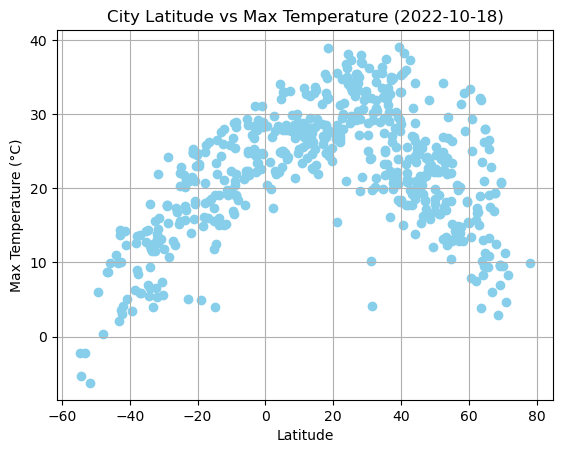

In [81]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",facecolor="skyblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs Max Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



### Latitute vs. Humidity

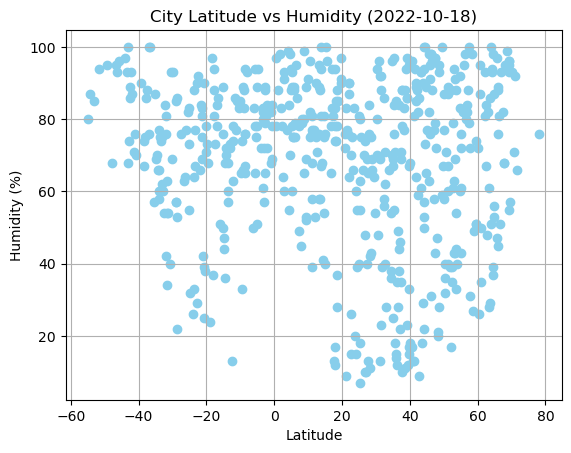

In [82]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",facecolor="skyblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude vs Cloudiness

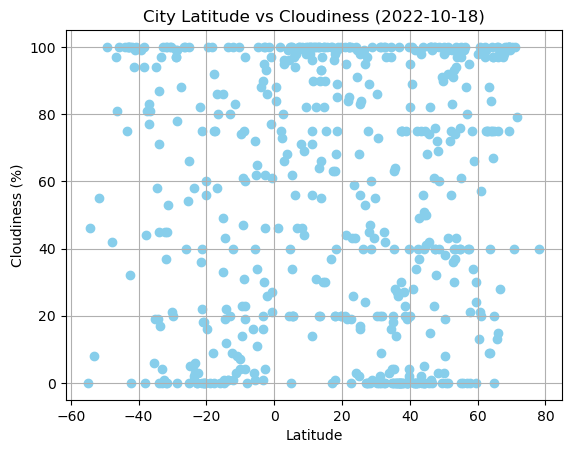

In [83]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",facecolor="skyblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude vs Wind Speed Plot

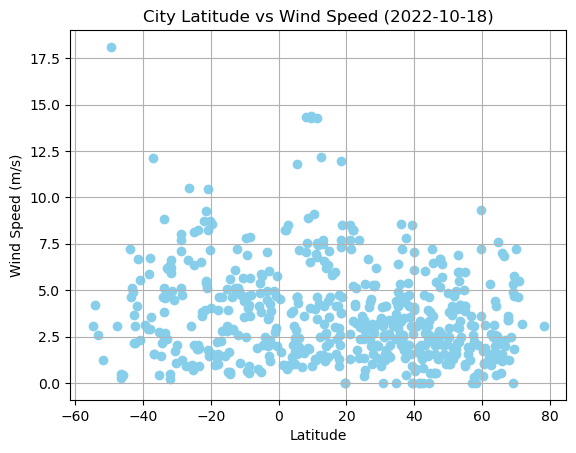

In [84]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",facecolor="skyblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

___
## Requirement 2: Compute Linear Regression for Each Relationship

In [132]:
# Define a function to create Linear Regression plots

def regline(x_data,y_data):
    (slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_data,y_data)
    return "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

def regvalue(x_data,y_data):
    (slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_data,y_data)
    return x_data*slope+intercept

def errvalue(x_data,y_data):
    (slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_data,y_data)
    return rvalue



In [128]:
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,20.91,37,97,2.51,RU,1690179865
1,hawaiian paradise park,19.5933,-154.9731,23.73,97,100,0.00,US,1690179866
4,remire-montjoly,4.9167,-52.2667,25.02,94,0,1.03,GF,1690179866
5,yellowknife,62.4560,-114.3525,17.29,67,75,1.54,CA,1690179866
6,manali,13.1667,80.2667,29.48,76,100,7.51,IN,1690179867


In [86]:
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,-6.24,94,55,1.24,CL,1690179663
3,waitangi,-43.9535,-176.5597,11.01,97,100,7.22,NZ,1690179866
7,port elizabeth,-33.9180,25.5701,12.16,66,0,5.14,ZA,1690179867
8,port saint john's,-31.6229,29.5448,14.49,63,45,5.94,ZA,1690179867
9,ta`u,-14.2336,-169.5144,26.44,72,22,5.61,AS,1690179867


###  Temperature vs. Latitude Linear Regression Plot

The r-value is :0.2854484816986979


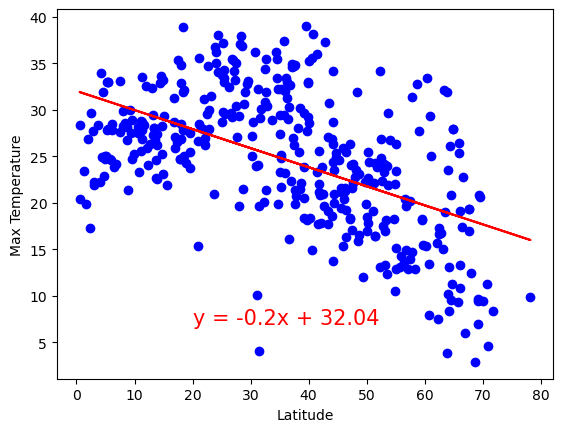

In [133]:

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],marker="o",facecolor="blue")
plt.plot(northern_hemi_df["Lat"],regvalue(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"]),"r-")
plt.annotate(regline(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"]),(20,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
rvalue=errvalue(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

print(f"The r-value is :{rvalue**2}")
plt.show()



The r-value is :0.6534887219782355


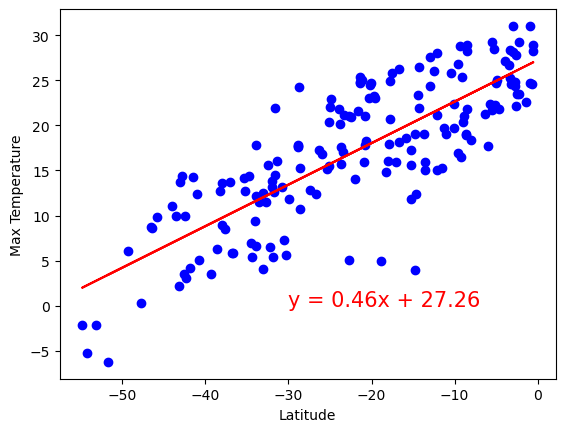

In [134]:

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],marker="o",facecolor="blue")
plt.plot(southern_hemi_df["Lat"],regvalue(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"]),"r-")
plt.annotate(regline(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"]),(-30,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
rvalue=errvalue(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

print(f"The r-value is :{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is :0.00198254457433472


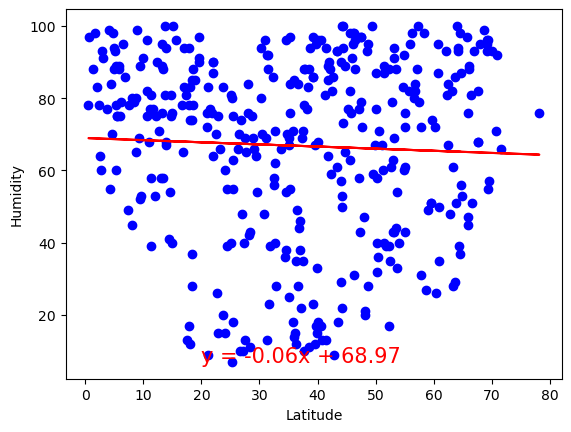

In [136]:

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],marker="o",facecolor="blue")
plt.plot(northern_hemi_df["Lat"],regvalue(northern_hemi_df["Lat"],northern_hemi_df["Humidity"]),"r-")
plt.annotate(regline(northern_hemi_df["Lat"],northern_hemi_df["Humidity"]),(20,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
rvalue=errvalue(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

print(f"The r-value is :{rvalue**2}")
plt.show()


The r-value is :0.6534887219782355


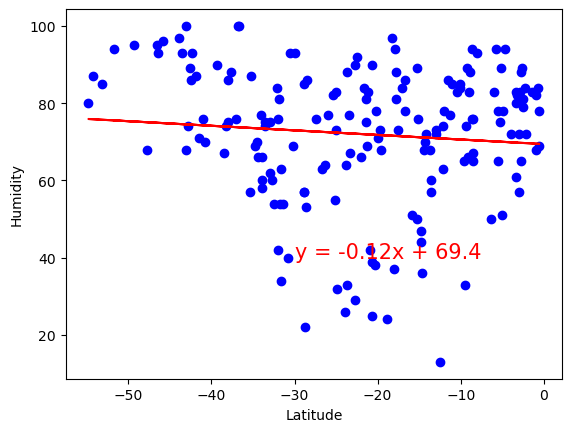

In [138]:
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],marker="o",facecolor="blue")
plt.plot(southern_hemi_df["Lat"],regvalue(southern_hemi_df["Lat"],southern_hemi_df["Humidity"]),"r-")
plt.annotate(regline(southern_hemi_df["Lat"],southern_hemi_df["Humidity"]),(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
rvalue=errvalue(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

print(f"The r-value is :{rvalue**2}")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is :0.005206993918625022


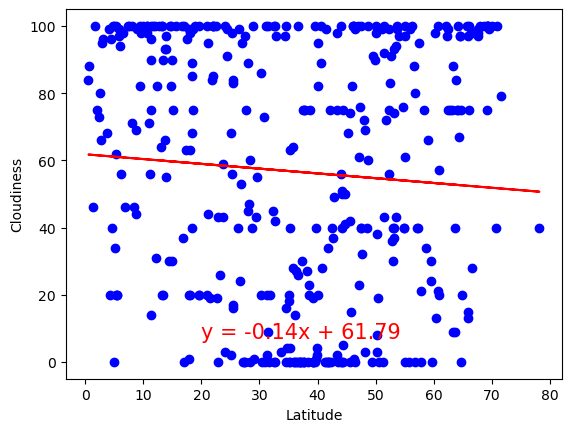

In [139]:
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],marker="o",facecolor="blue")
plt.plot(northern_hemi_df["Lat"],regvalue(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"]),"r-")
plt.annotate(regline(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"]),(20,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
rvalue=errvalue(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

print(f"The r-value is :{rvalue**2}")
plt.show()


The r-value is :0.02780468551898001


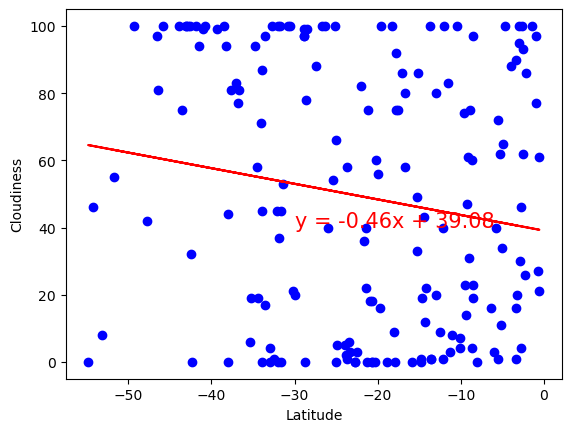

In [140]:
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],marker="o",facecolor="blue")
plt.plot(southern_hemi_df["Lat"],regvalue(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"]),"r-")
plt.annotate(regline(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"]),(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
rvalue=errvalue(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

print(f"The r-value is :{rvalue**2}")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is :0.050959704273460533


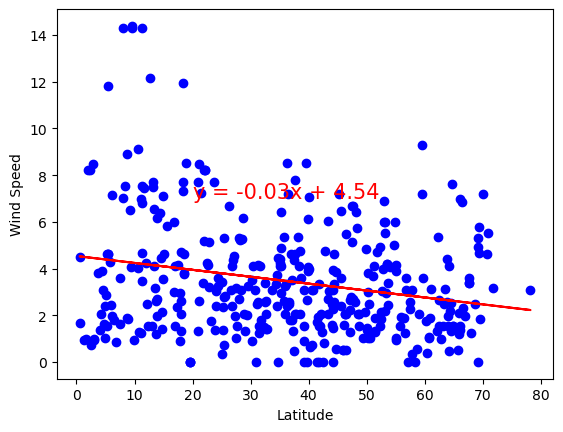

In [141]:
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],marker="o",facecolor="blue")
plt.plot(northern_hemi_df["Lat"],regvalue(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"]),"r-")
plt.annotate(regline(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"]),(20,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
rvalue=errvalue(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

print(f"The r-value is :{rvalue**2}")
plt.show()


The r-value is :0.004858697095469893


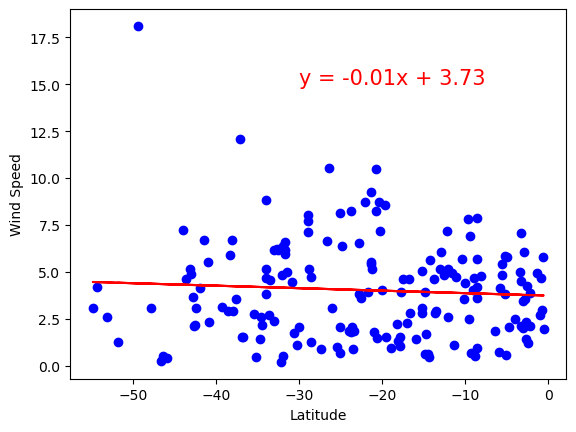

In [144]:
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],marker="o",facecolor="blue")
plt.plot(southern_hemi_df["Lat"],regvalue(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"]),"r-")
plt.annotate(regline(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"]),(-30,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
rvalue=errvalue(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

print(f"The r-value is :{rvalue**2}")
plt.show()